In [1]:
import random
from PIL import Image, ImageDraw
from pylab import *
import numpy as np

In [2]:
def get_image_size(im):
    return (int(im[0].size / 3), int(im.size / im[0].size))

In [3]:
def binary_image_to_matrix(im):
    xm, ym = get_image_size(im)

    a = np.zeros((ym, xm))

    for i in range(ym):
        for j in range(xm):
            if(im[i][j][0] < 200):
                a[i][j] = 1
                
    return a

In [4]:
def extention(ae, b):
    a = copy(ae)
    xb = int((len(b[0]) - 1) / 2)
    yb = int((len(b) - 1) / 2)
    
    xa = len(a[0])
    ya = len(a)
    
    for i in range(ya):
        for j in range(xa):
            if(a[i][j] == 1):
                for ib in range(-yb, yb + 1):
                    for jb in range(-xb, xb + 1):
                        if((i + ib >= 0) and 
                           (i + ib < ya) and 
                           (j + jb >= 0) and 
                           (j + jb < xa)):
                            if(a[i + ib][j + jb] == 0 and b[yb + ib][xb + jb] == 1):
                                a[i + ib][j + jb] = 2
                                
    for i in range(ya):
        for j in range(xa):
            if(a[i][j] != 0):
                a[i][j] = 1
                
    return a

In [5]:
def erosion(ae, b):
    xa = len(ae[0])
    ya = len(ae)
    
    xb = int((len(b[0]) - 1) / 2)
    yb = int((len(b) - 1) / 2)
    
    a = np.zeros((ya, xa))
    
    for i in range(ya):
        for j in range(xa):
            if(ae[i][j] == 1):
                flag = True
                for ib in range(-yb, yb + 1):
                    for jb in range(-xb, xb + 1):
                        if((i + ib >= 0) and 
                           (i + ib < ya) and 
                           (j + jb >= 0) and 
                           (j + jb < xa)):
                            if(ae[i + ib][j + jb] == 0 and b[yb + ib][xb + jb] == 1):
                                flag = False
                if(flag):
                    a[i][j] = 1
                    
    return a

In [6]:
def sub(a1, a2):
    a = copy(a1)
    xa = len(a1[0])
    ya = len(a1)
    
    for i in range(ya):
        for j in range(xa):
            if(a1[i][j] == 1 and a2[i][j] == 1):
                a[i][j] = 0
                
    return a

In [7]:
def add(a1, a2):
    a = copy(a1)
    xa = len(a1[0])
    ya = len(a1)
    
    for i in range(ya):
        for j in range(xa):
            if(a1[i][j] == 1 or a2[i][j] == 1):
                a[i][j] = 1
                
    return a

In [8]:
def is_empty(a):
    xa = len(a[0])
    ya = len(a)
    
    for i in range(ya):
        for j in range(xa):
            if(a[i][j] == 1):
                return False
                
    return True

In [9]:
def get_skelet_sets(a, b):  
    y1 = copy(a)
    
    s = []

    while(True):
        y2 = erosion(y1, b)
        
        if(is_empty(y2)):
            s.append(y1)
            return s
        
        y3 = extention(y2, b)
        s.append(sub(y1, y3))
        y1 = copy(y2)

In [10]:
def get_skelet_image(skelet_sets):
    x = skelet_sets[0]
    for i in range(1, len(skelet_sets)):
        x = add(x, skelet_sets[i])
    return x

In [11]:
def restore_original_image(skelet_sets, b):
    n = len(skelet_sets)
    im = skelet_sets[-1]
    for i in range(1, len(skelet_sets)):
        im = extention(im, b)
        im = add(im, skelet_sets[n - i - 1])
    return im

In [12]:
b1 = [[1, 1, 1, 1, 1],
      [1, 1, 1, 1, 1],
      [1, 1, 1, 1, 1],
      [1, 1, 1, 1, 1],
      [1, 1, 1, 1, 1]]

b2 = [[0, 0, 1, 0, 0],
      [0, 1, 1, 1, 0],
      [1, 1, 1, 1, 1],
      [0, 1, 1, 1, 0],
      [0, 0, 1, 0, 0]]

# Изображение №1, структурирующий элемент №1

In [13]:
a1 = binary_image_to_matrix(array(Image.open('./images/lab1/fig1.jpg')))
s1 = get_skelet_sets(a1, b1)
x1 = get_skelet_image(s1)
a1_restored = restore_original_image(s1, b1)

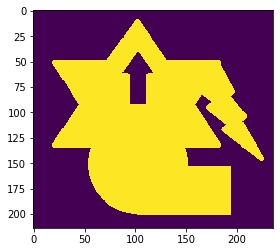

In [14]:
# original image
imshow(a1)

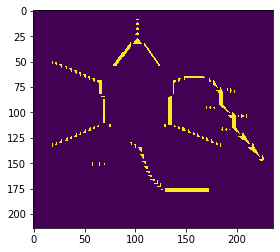

In [15]:
# image skeleton
imshow(x1)

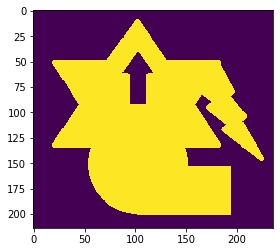

In [16]:
# original image restored from its skeleton
imshow(a1_restored)

# Изображение №1, структурирующий элемент №2

In [17]:
a1 = binary_image_to_matrix(array(Image.open('./images/lab1/fig1.jpg')))
s1 = get_skelet_sets(a1, b2)
x1 = get_skelet_image(s1)
a1_restored = restore_original_image(s1, b2)

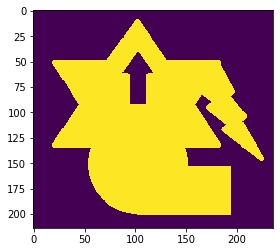

In [18]:
# original image
imshow(a1)

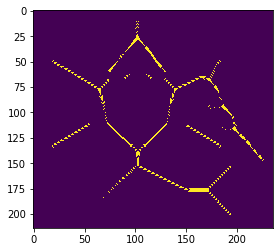

In [19]:
# image skeleton
imshow(x1)

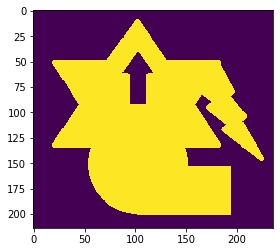

In [20]:
# original image restored from its skeleton
imshow(a1_restored)

# Изображение №2, структурирующий элемент №1

In [21]:
a1 = binary_image_to_matrix(array(Image.open('./images/lab1/fig2.jpg')))
s1 = get_skelet_sets(a1, b1)
x1 = get_skelet_image(s1)
a1_restored = restore_original_image(s1, b1)

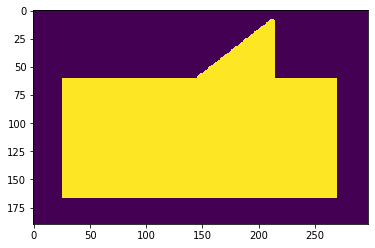

In [22]:
# original image
imshow(a1)

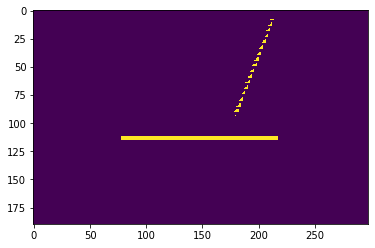

In [23]:
# image skeleton
imshow(x1)

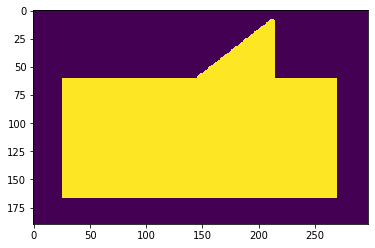

In [24]:
# original image restored from its skeleton
imshow(a1_restored)

# Изображение №2, структурирующий элемент №2

In [25]:
a1 = binary_image_to_matrix(array(Image.open('./images/lab1/fig2.jpg')))
s1 = get_skelet_sets(a1, b2)
x1 = get_skelet_image(s1)
a1_restored = restore_original_image(s1, b2)

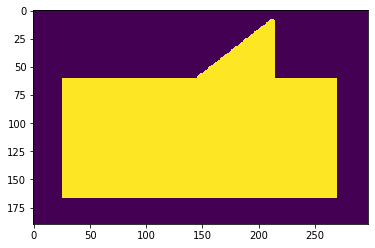

In [26]:
# original image
imshow(a1)

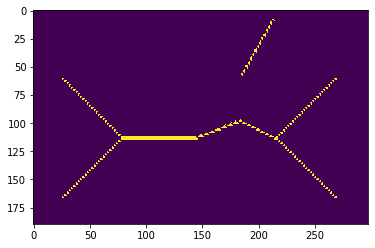

In [27]:
# image skeleton
imshow(x1)

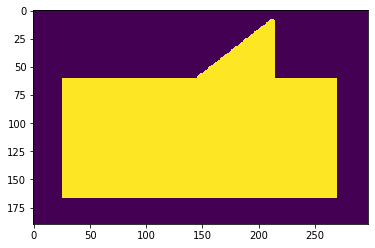

In [28]:
# original image restored from its skeleton
imshow(a1_restored)